## Workflow - Social Listening on Twitter | Marketing Insights (Athlete, Team, Brand)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
```

In [28]:
import pandas as pd

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns, rows, and column width of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
```

In [29]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `tweets.csv` file located in the `data` directory (folder), also specifying that the csv `date` column is `datetime` data
```
raw_data = pd.read_csv("data/tweets.csv", parse_dates=["date"])
```

In [30]:
raw_data = pd.read_csv("data/tweets.csv", parse_dates=["date"])

**2.1 Data Prep** - make copy of raw data to edit.

```
df = raw_data.copy()
```

In [31]:
df = raw_data.copy()

**2.2 Data Prep** - check the top of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [32]:
df.head()

,date,id,text,lang,source,likes,quotes,replies,retweets,author.username,author.name,author.description,author.location,followers,following,annotationsKWs,hashtagsKWs,mentionsKWs,barcelona,england,man_city,lucy_bronze
0,2022-09-11 22:16:42+00:00,1.569090e+18,England Lionesses stars Keira Walsh and Lucy Bronze’s Barcelona debuts end in disaster after referee fails to turn up - 11 September 2022.\nRead More: https://t.co/bGqNg8U1pM https://t.co/eFbFsk4BvG,en,theguru.pro,1,0,0,0,EyePeaTV,The Guru,Retro Gamer\nCoder\nKodi User\nWeb Designer\nHoster,"England, United Kingdom",428,120,"['england lionesses', 'keira walsh', 'lucy bronze', 'barcelona']",NaN,NaN,True,True,False,True
1,2022-09-11 22:05:49+00:00,1.569080e+18,@MariaTikas @sport @keira_walsh 😊😊😊,und,Twitter Web App,0,0,0,0,asobauer,Aso Bauer,C.T.U,"Virginia, USA",344,540,NaN,NaN,"['mariatikas', 'sport', 'keira_walsh']",False,False,False,False
2,2022-09-11 22:05:06+00:00,1.569080e+18,England Lionesses stars Keira Walsh and Lucy Bronze’s Barcelona debuts end in disaster after referee fails to turn up https://t.co/k8hKLCFSp6,en,Publer.io,1,0,0,0,FootballReportg,Football Reporting ,Football Reporting Your daily #Football #News Site,NaN,106,77,"['england lionesses', 'keira walsh', 'lucy bronze', 'barcelona']",NaN,NaN,True,True,False,True
3,2022-09-11 22:02:56+00:00,1.569080e+18,Lionesses star duo Lucy Bronze and Keira Walsh are made to wait to make their Barcelona debuts https://t.co/jdS8cACc7C,en,WordPress.com,1,0,0,0,Veika64150921,Veika,NaN,NaN,0,1,"['lucy bronze', 'keira walsh', 'barcelona']",NaN,NaN,True,False,False,True
4,2022-09-11 21:59:40+00:00,1.569080e+18,Pensábamos que el yayo no iba a mover el culo para el mercado de fichajes y aquí estoy en una foto con Keira Walsh vestida de culé https://t.co/nLzENvZ1xe,es,Twitter for Android,4,0,0,0,Lurasidone_,Sero,how can i be homophobic? i'm fucking culé,(Ella),761,744,['keira walsh'],NaN,NaN,False,False,False,False


**2.3 Data Prep** - check the dimensions of the df (<no. of rows>, <no. of columns>). Should be (5030, 22)
```
df.shape
```

In [33]:
df.shape

(5030, 22)

---
> ### 3. EXPLORATORY DATA ANALYSIS (EDA)

**3.0 EDA** - filter the df to return the row of the tweet with the highest no. of likes in this dataset
```
df[df["likes"] == df["likes"].max()]
```

In [34]:
df[df["likes"] == df["likes"].max()]

,date,id,text,lang,source,likes,quotes,replies,retweets,author.username,author.name,author.description,author.location,followers,following,annotationsKWs,hashtagsKWs,mentionsKWs,barcelona,england,man_city,lucy_bronze
2494,2022-09-07 15:22:15+00:00,1.567530e+18,Keira Walsh joins Barcelona Femeni for a world record fee of €400k 🤯 https://t.co/TK9nKceKWb,en,Twitter Web App,13429,151,243,541,goal,GOAL,This Is Everything.,Everywhere,6142354,443,"['keira walsh', 'barcelona femeni']",NaN,NaN,True,False,False,False


**3.1 EDA** - filter the df to return the rows where the tweet text contains a certain string object (i.e. text)
```
df[df["text"].str.contains("nike")]
```

In [35]:
df[df["text"].str.contains("nike")]

,date,id,text,lang,source,likes,quotes,replies,retweets,author.username,author.name,author.description,author.location,followers,following,annotationsKWs,hashtagsKWs,mentionsKWs,barcelona,england,man_city,lucy_bronze
598,2022-09-08 16:05:58+00:00,1.567910e+18,Fun facts 😉 : \nAddition of another Midfielder that uses the @nikefootball Phantom GT Elite 2 Lucent Pack into the Team!\nPlayers especially Midfielders that use this Boots are Maestros of the game by my books 😎.\n@keira_walsh 🤝 @alexiaputellas https://t.co/5VF3ek0f8w,en,Twitter for Android,41,1,1,5,Seyijohnson_js,Johnson,Cynophile et Ailurophile 😺🐶 - FCB Femeni 💙❤️ - Football enthusiast ⚽ - Football Boots Design Appreciator 💯\nVicky Lopez 💎 fan🇪🇸🇳🇬!,NaN,176,705,['phantom gt elite 2 lucent pack'],NaN,"['nikefootball', 'keira_walsh', 'alexiaputellas']",False,False,False,False


---
> ### 4. DATA ANALYSIS & VISUALISATION

**4.0 ANALYSIS/VIZ PREP** - convert the `date` column into the df `index`, i.e. ID for each row
```
df.set_index("date", inplace=True)
```

In [36]:
df.set_index("date", inplace=True)

**4.1 ANALYSIS/VIZ** - aggregate the Keira Walsh tweets which also reference Barcelona, Man City, and England by a chosen period of time and plot over time
```
df[["barcelona", "man_city", "england"]].resample("H").sum().plot( figsize=(30,8))
```

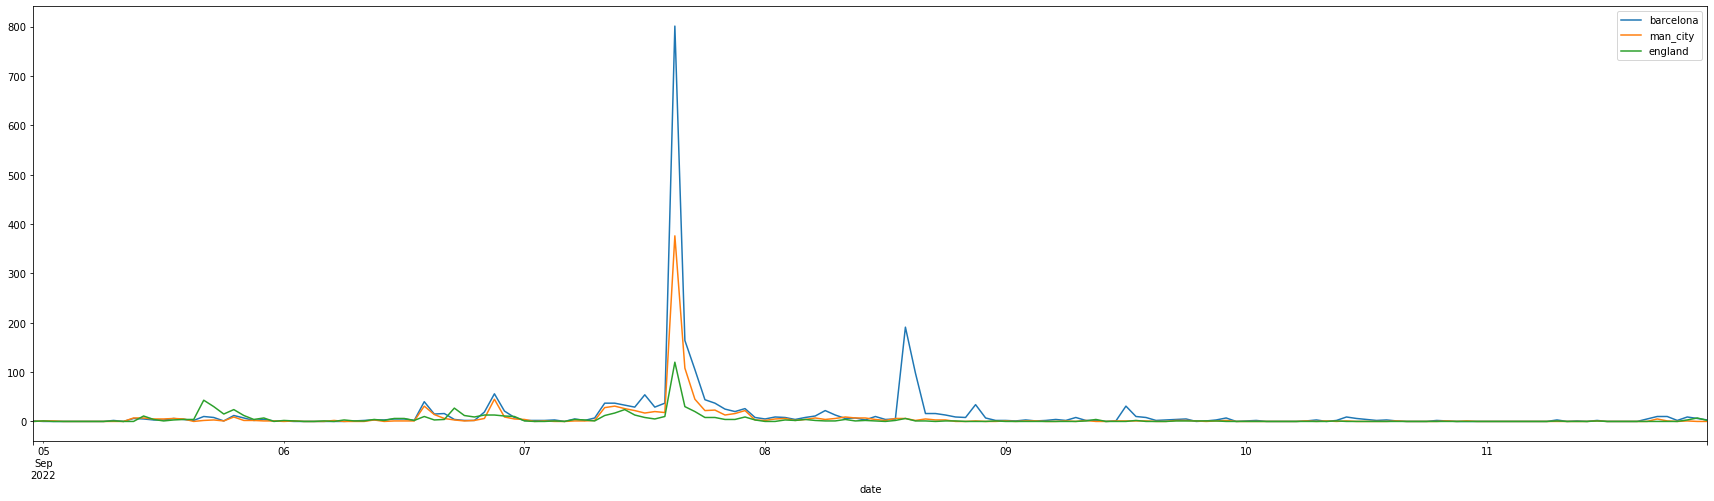

In [69]:
df[["barcelona", "man_city", "england"]].resample("H").sum().plot( figsize=(30,8))

**4.2 ANALYSIS/VIZ PREP** - create a new column called `count` which has the value of 1 every row
```
df = df.assign(count=1)
```

In [38]:
df = df.assign(count=1)

**4.3 ANALYSIS/VIZ PREP** - create a new df called `language` made up of the `lang` and `count` columns of the original df, and with `date` as a column not index anymore 
```
language = df[["lang", "count"]].reset_index().copy()
```

In [39]:
language = df[["lang", "count"]].reset_index().copy()

**4.4 ANALYSIS/VIZ PREP** - check new `language` df
```
language.head()
```

In [40]:
language.head()

,date,lang,count
0,2022-09-11 22:16:42+00:00,en,1
1,2022-09-11 22:05:49+00:00,und,1
2,2022-09-11 22:05:06+00:00,en,1
3,2022-09-11 22:02:56+00:00,en,1
4,2022-09-11 21:59:40+00:00,es,1


**4.5 ANALYSIS/VIZ** - make a frequency table and normalize the values to see which languages were used for different proportion of the tweets in the dataset
```
language["lang"].value_counts(normalize=True)
```

In [41]:
language["lang"].value_counts(normalize=True)

en     0.515308
es     0.230219
und    0.063221
ca     0.036779
pt     0.029821
fr     0.024254
qme    0.017694
tl     0.017495
in     0.016700
de     0.008549
qam    0.004771
nl     0.003976
ar     0.003380
pl     0.003181
tr     0.003181
is     0.003181
zxx    0.002982
it     0.002982
fi     0.002584
lt     0.001590
sv     0.000994
no     0.000795
ja     0.000795
cs     0.000795
da     0.000795
ht     0.000596
cy     0.000596
fa     0.000398
eu     0.000398
hu     0.000398
el     0.000199
zh     0.000199
ro     0.000199
bn     0.000199
lv     0.000199
ml     0.000199
et     0.000199
hi     0.000199
Name: lang, dtype: float64

**4.6 ANALYSIS/VIZ PREP** - using the frequency table insight, update the values in the `lang` column so any languages other than England, Spanish, and Catalan are represented by the string `"other"`
```
language["lang"] = language["lang"].apply(lambda x: x if x in ["en", "es", "ca"] else "other")
```

In [42]:
language["lang"] = language["lang"].apply(lambda x: x if x in ["en", "es", "ca"] else "other")

**4.7 ANALYSIS/VIZ PREP** - check this re-categorisation by generating another frequency table
```
language["lang"].value_counts()
```

In [44]:
language["lang"].value_counts(normalize=True)

en       0.515308
es       0.230219
other    0.217694
ca       0.036779
Name: lang, dtype: float64

**4.8 ANALYSIS/VIZ** - plot the `date` and `lang` columns which have been transformed to as aggregates of number of tweets by the 4 language categories by a time period
```
language.groupby(["date", "lang"]).sum().unstack().resample("H").sum().plot(kind="area", figsize=(30,8))
```

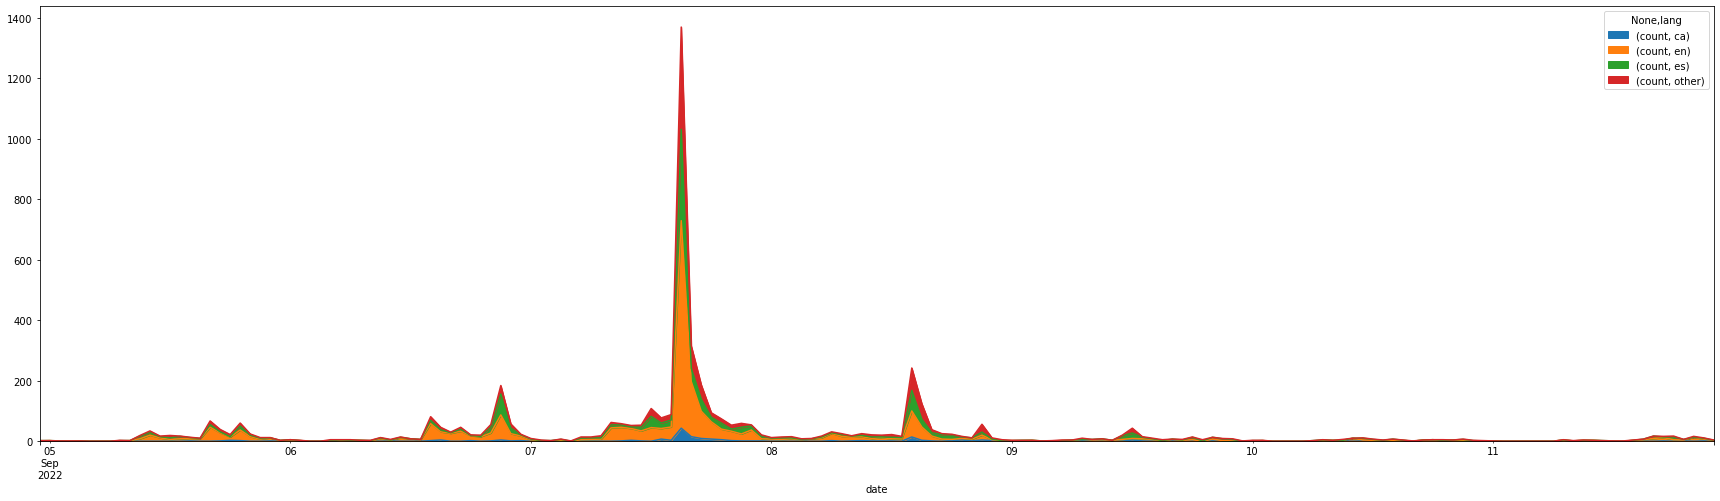

In [71]:
language.groupby(["date", "lang"]).sum().unstack().resample("H").sum().plot(kind="area", figsize=(30,8))

---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_